# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

- This script performs data loading, preprocessing, scaling, and clustering on the California Housing dataset.
- It includes steps to handle missing values, encode categorical features, apply PCA for dimension reduction, and utilize Agglomerative Clustering with various configurations to evaluate clustering performance.
- The script also includes visualization of clustering results using scatter plots and dendrograms, highlighting the geographical distribution of clusters and the hierarchical structure of data aggregation.


# Data Loading & Preprocessing

In [2]:
path = 'C:\\Users\\zcindemir\\Desktop\\Data Mining Project\\housing.csv'
housing = pd.read_csv(path)

housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

encoder = OneHotEncoder()
ocean_proximity_encoded = encoder.fit_transform(housing[['ocean_proximity']]).toarray()
feature_names = encoder.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=feature_names)
housing_encoded = pd.concat([housing.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_encoded)

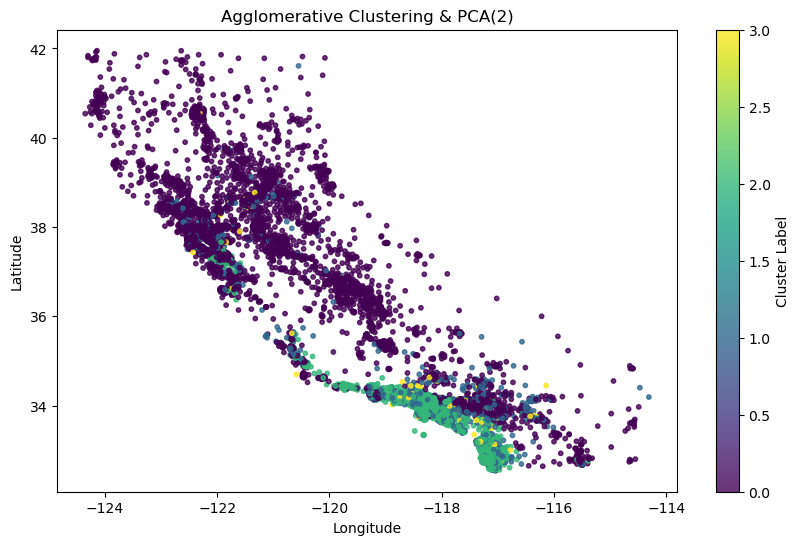

In [3]:
pca = PCA(n_components=2)
housing_pca = pca.fit_transform(housing_scaled)

agg_clust_pca = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
agg_clust_pca.fit(housing_pca)


plt.figure(figsize=(10, 6))
plt.scatter(housing['longitude'], housing['latitude'], c=agg_clust_pca.labels_, cmap='viridis', s=10, alpha=0.8)
plt.colorbar(label='Cluster Label')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Agglomerative Clustering & PCA(2)')
plt.show()

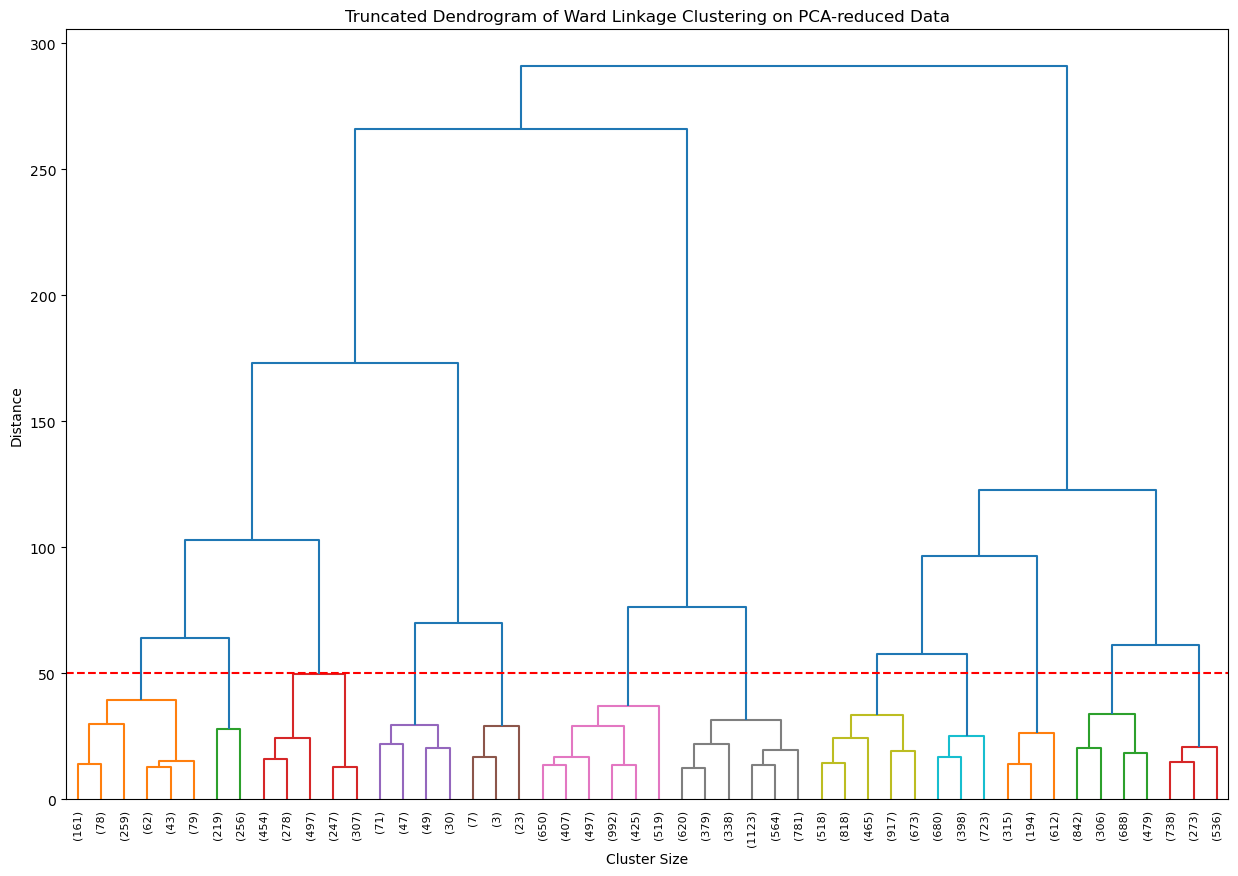

In [4]:
linked_ward = linkage(housing_pca, 'ward')
max_d_ward = 50

plt.figure(figsize=(15, 10))
dendrogram(linked_ward,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           color_threshold=max_d_ward,
           truncate_mode='lastp',
           p=50)
plt.title('Truncated Dendrogram of Ward Linkage Clustering on PCA-reduced Data')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=max_d_ward, color='r', linestyle='--')
plt.show()

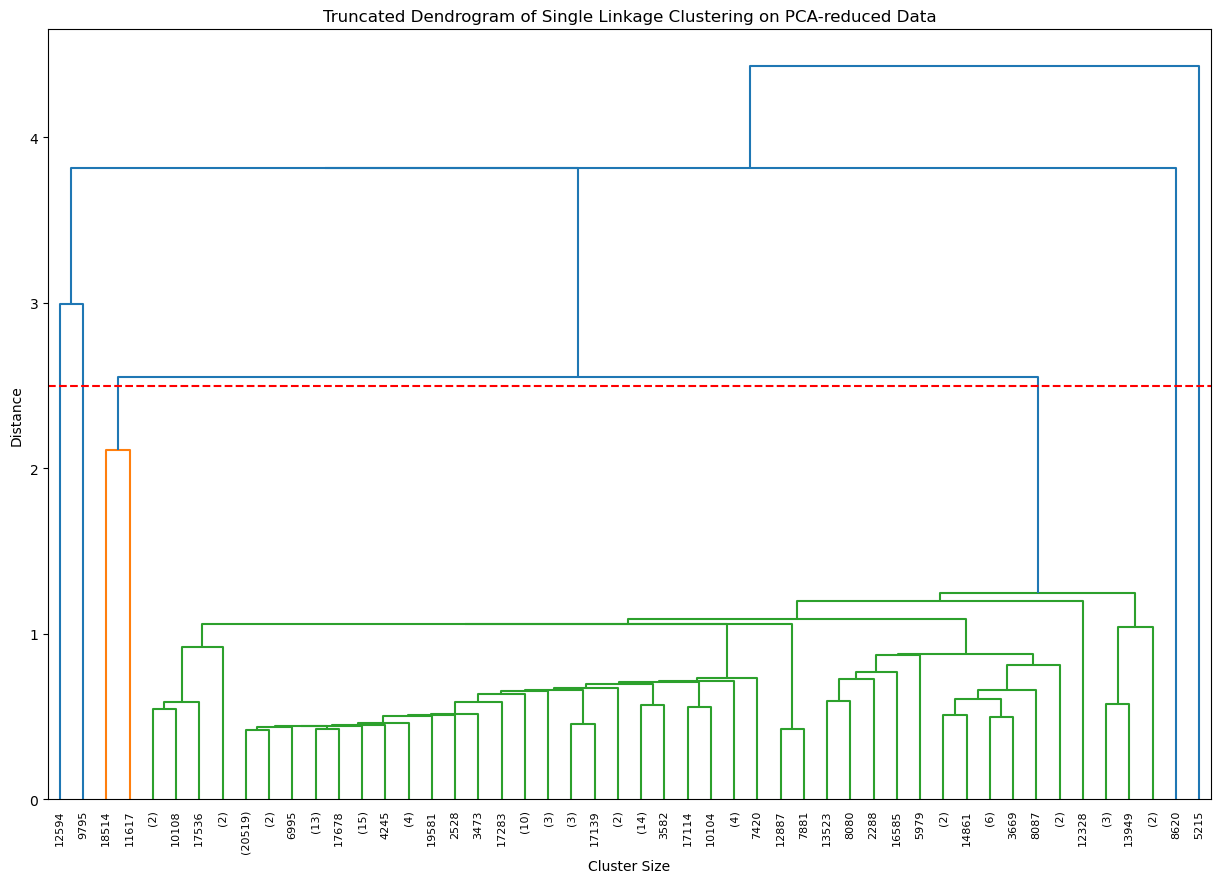

In [5]:
linked_single = linkage(housing_pca, 'single')
max_d_single = 2.5


plt.figure(figsize=(15, 10))
dendrogram(linked_single,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           color_threshold=max_d_single,
           truncate_mode='lastp',
           p=50)

plt.title('Truncated Dendrogram of Single Linkage Clustering on PCA-reduced Data')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=max_d_single, color='r', linestyle='--')
plt.show()

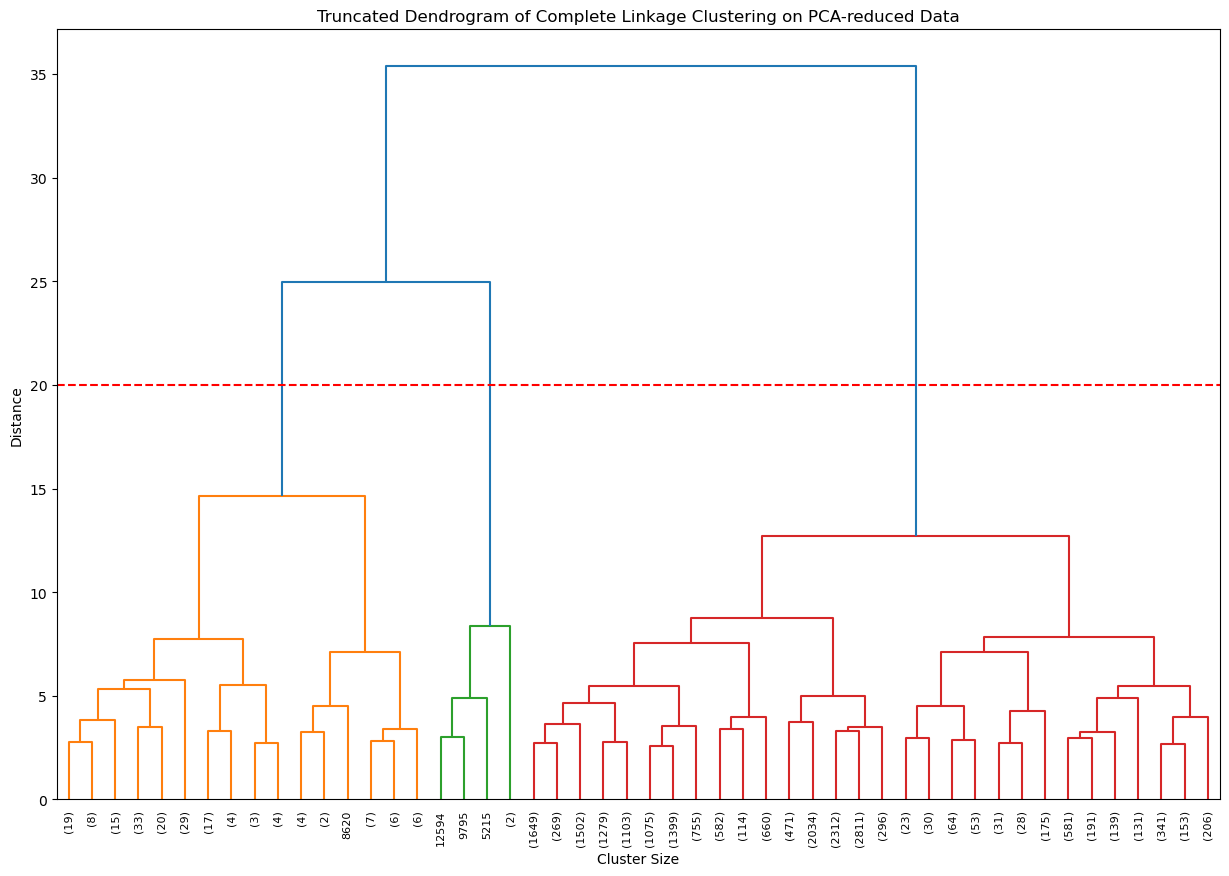

In [6]:
linked_complete = linkage(housing_pca, 'complete')
max_d_complete = 20


plt.figure(figsize=(15, 10))
dendrogram(linked_complete,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           color_threshold=max_d_complete,
           truncate_mode='lastp',
           p=50)

plt.title('Truncated Dendrogram of Complete Linkage Clustering on PCA-reduced Data')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=max_d_complete, color='r', linestyle='--')
plt.show()

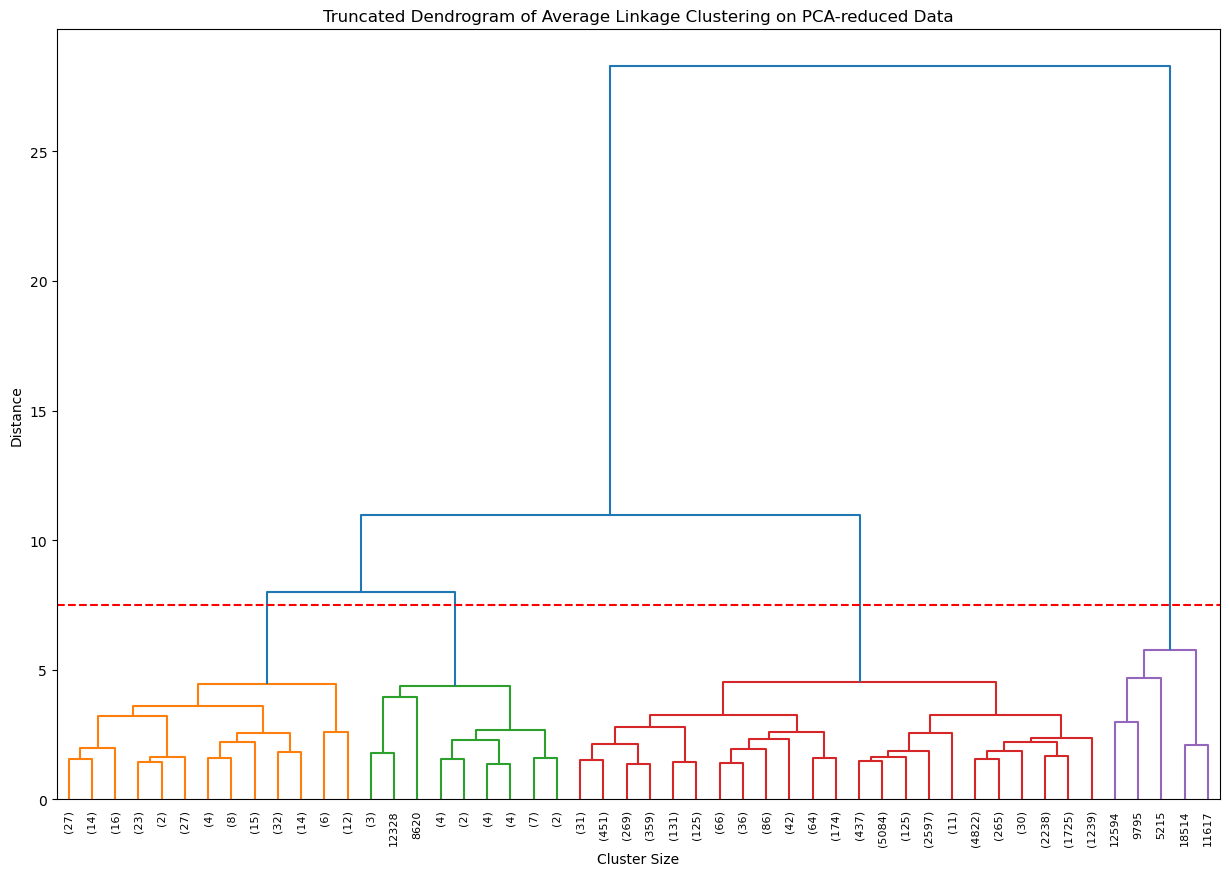

In [7]:
linked_average = linkage(housing_pca, 'average')
max_d_average = 7.5

plt.figure(figsize=(15, 10))
dendrogram(linked_average,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           color_threshold=max_d_average,
           truncate_mode='lastp',
           p=50)

plt.title('Truncated Dendrogram of Average Linkage Clustering on PCA-reduced Data')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=max_d_average, color='r', linestyle='--')
plt.show()

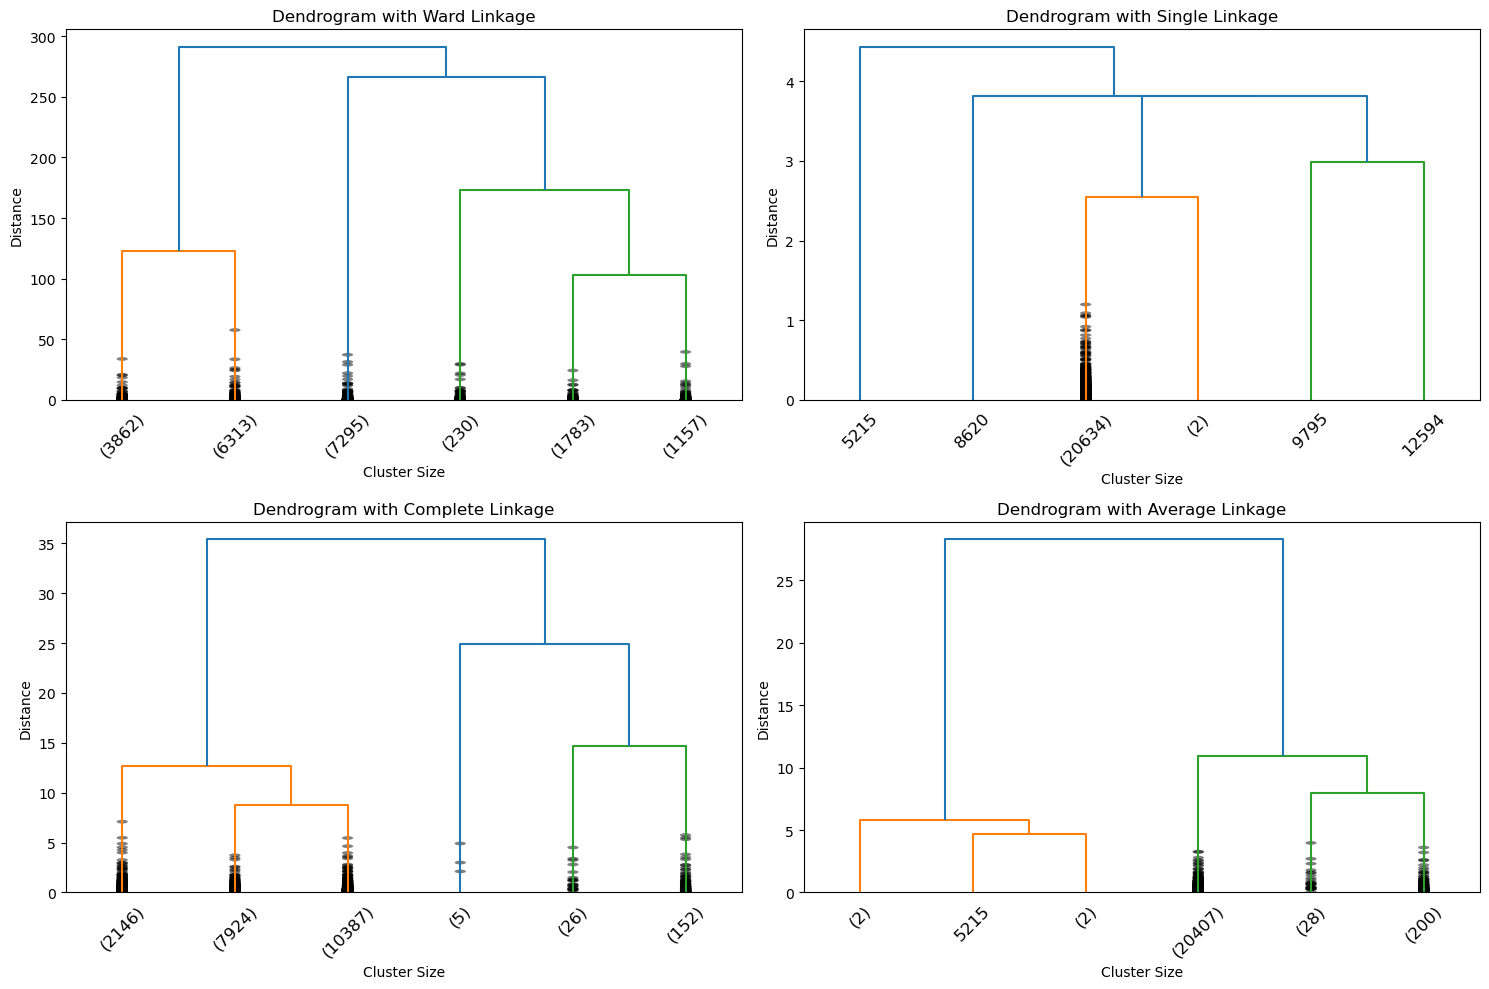

In [8]:
linkage_methods = ['ward', 'single', 'complete', 'average']
linkage_matrices = {}

for method in linkage_methods:
    linkage_matrices[method] = linkage(housing_pca, method)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (method, linked) in enumerate(linkage_matrices.items()):
    dendrogram(linked,
               ax=axs[i],
               truncate_mode='lastp',
               p=6,
               leaf_rotation=45.,
               leaf_font_size=12.,
               show_contracted=True)
    axs[i].set_title(f'Dendrogram with {method.capitalize()} Linkage')
    axs[i].set_xlabel('Cluster Size')
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()